In [54]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('/content/drive/MyDrive/intern/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [56]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [58]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


CHECKING NULL VALUES

In [59]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [61]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [62]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

**FINDING OUTLIERS**

<Axes: xlabel='Age'>

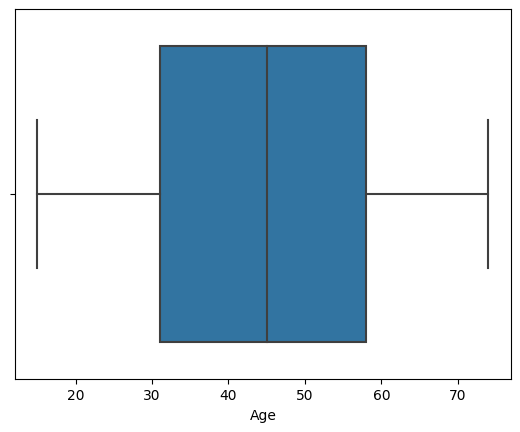

In [63]:
sns.boxplot(x=df.Age)

for age attribute there is no outliers so no need replace the values

<Axes: xlabel='Na_to_K'>

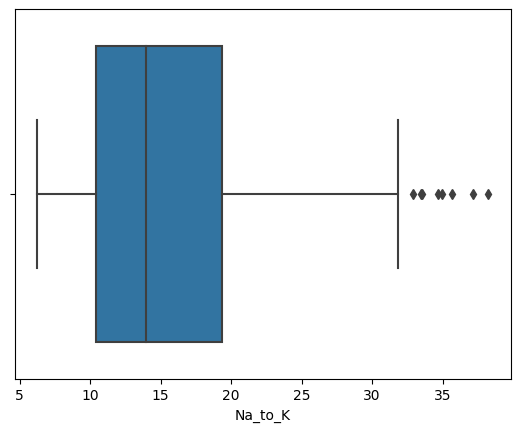

In [64]:
sns.boxplot(x=df.Na_to_K)

**REPLACING THE OUTLIERS USING MEDAIN METHOD**

In [68]:
q1 = df.Na_to_K.quantile(.25)
q3 = df.Na_to_K.quantile(.75)

In [69]:
IQR = q3 - q1
IQR

8.9345

In [70]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR

In [71]:
df.median()

<ipython-input-71-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age        45.0000
Na_to_K    13.9365
dtype: float64

In [72]:
df['Na_to_K'] =np.where(df['Na_to_K']>upper_limit,13.9,df['Na_to_K'])

<Axes: xlabel='Na_to_K'>

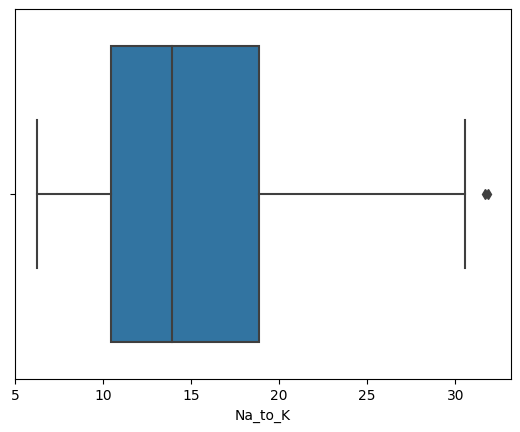

In [73]:
sns.boxplot(x=df.Na_to_K) 

THERE IS NO OUTLIERS

we have splitting the data
step:1-->split dependent and independent(target column is dependent others are independent)
step:2-->split training and testing data

In [74]:
x=df.loc[:,'Age':'Na_to_K']  
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [75]:
y=df['Drug'] #dependent variable
y.head()
y=pd.DataFrame(y)
y

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


**#after spliting the dependent and independent data we have to split the training and testing data**

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
#after spliting the dependent and independent data we have to split the training and testing data
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=21) #0.2-->20%

In [78]:
xtrain.shape,xtest.shape

((160, 5), (40, 5))

In [79]:
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
176,48,M,HIGH,NORMAL,10.446
111,47,F,NORMAL,NORMAL,6.683
114,20,F,NORMAL,NORMAL,9.281
14,50,F,NORMAL,HIGH,12.703
106,22,M,NORMAL,HIGH,11.953
...,...,...,...,...,...
120,28,M,NORMAL,HIGH,27.064
112,35,M,LOW,NORMAL,9.170
48,23,M,NORMAL,HIGH,31.686
4,61,F,LOW,HIGH,18.043


In [80]:
xtest

,Age,Sex,BP,Cholesterol,Na_to_K
144,39,M,HIGH,HIGH,9.664
9,43,M,LOW,NORMAL,19.368
17,43,M,HIGH,HIGH,13.972
20,57,M,LOW,NORMAL,19.128
45,66,F,NORMAL,NORMAL,8.107
6,49,F,NORMAL,HIGH,16.275
52,62,M,LOW,NORMAL,27.183
91,41,M,HIGH,NORMAL,15.156
129,32,F,NORMAL,HIGH,7.477
183,36,F,HIGH,NORMAL,15.490


In [81]:
ytrain.shape,ytest.shape

((160, 1), (40, 1))

In [82]:
ytrain

,Drug
176,drugA
111,drugX
114,drugX
14,drugX
106,drugX
...,...
120,DrugY
112,drugX
48,DrugY
4,DrugY


In [83]:
ytest

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX
6,DrugY
52,DrugY
91,DrugY
129,drugX
183,DrugY


#whenever we built the model the datatype should be in int or float otherwise it will give error
#Encoding--> one hot encoding,label encoding,manual encoding

In [84]:
#import libraries for the encoding (label encoding)
from sklearn.preprocessing import LabelEncoder

In [85]:
#initialise the library
le=LabelEncoder()

In [86]:
xtrain['Sex'] = le.fit_transform(xtrain['Sex'])
xtrain['Sex']

176    1
111    0
114    0
14     0
106    1
      ..
120    1
112    1
48     1
4      0
56     1
Name: Sex, Length: 160, dtype: int64

In [87]:
xtest['Sex'] = le.transform(xtest['Sex'])
xtest['Sex']

144    1
9      1
17     1
20     1
45     0
6      0
52     1
91     1
129    0
183    0
21     1
42     1
105    1
145    1
87     1
152    1
124    0
92     0
101    0
13     0
108    1
75     1
40     0
198    1
191    1
192    1
194    0
117    0
2      1
131    1
19     0
143    1
147    0
22     1
102    0
60     0
136    0
168    0
138    1
54     0
Name: Sex, dtype: int64

In [88]:
xtrain['BP'] = le.fit_transform(xtrain['BP'])
xtrain['BP']

176    0
111    2
114    2
14     2
106    2
      ..
120    2
112    1
48     2
4      1
56     0
Name: BP, Length: 160, dtype: int64

In [89]:
xtest['BP'] = le.transform(xtest['BP'])
xtest['BP']

144    0
9      1
17     0
20     1
45     2
6      2
52     1
91     0
129    2
183    0
21     2
42     2
105    1
145    2
87     1
152    2
124    0
92     0
101    0
13     1
108    0
75     1
40     2
198    2
191    0
192    1
194    0
117    2
2      1
131    1
19     0
143    0
147    0
22     1
102    1
60     1
136    0
168    1
138    0
54     0
Name: BP, dtype: int64

In [90]:
xtrain['Cholesterol'] = le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

176    1
111    1
114    1
14     0
106    0
      ..
120    0
112    1
48     0
4      0
56     1
Name: Cholesterol, Length: 160, dtype: int64

In [91]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest['Cholesterol']

144    0
9      1
17     0
20     1
45     1
6      0
52     1
91     1
129    0
183    1
21     0
42     1
105    1
145    0
87     0
152    1
124    1
92     0
101    0
13     0
108    1
75     1
40     0
198    1
191    0
192    0
194    0
117    0
2      0
131    1
19     1
143    1
147    1
22     1
102    0
60     1
136    0
168    1
138    1
54     1
Name: Cholesterol, dtype: int64

In [92]:
ytrain['Drug'] = le.fit_transform(ytrain['Drug'])
ytrain['Drug']

176    1
111    4
114    4
14     4
106    4
      ..
120    0
112    4
48     0
4      0
56     2
Name: Drug, Length: 160, dtype: int64

In [93]:
ytest['Drug'] = le.transform(ytest['Drug'])
ytest['Drug']

144    1
9      0
17     1
20     0
45     4
6      0
52     0
91     0
129    4
183    0
21     0
42     0
105    4
145    4
87     0
152    4
124    2
92     0
101    1
13     0
108    2
75     0
40     0
198    4
191    1
192    0
194    0
117    4
2      3
131    0
19     0
143    0
147    1
22     0
102    3
60     0
136    2
168    0
138    2
54     2
Name: Drug, dtype: int64

In [94]:
#after encoding the data
xtrain

,Age,Sex,BP,Cholesterol,Na_to_K
176,48,1,0,1,10.446
111,47,0,2,1,6.683
114,20,0,2,1,9.281
14,50,0,2,0,12.703
106,22,1,2,0,11.953
...,...,...,...,...,...
120,28,1,2,0,27.064
112,35,1,1,1,9.170
48,23,1,2,0,31.686
4,61,0,1,0,18.043


In [95]:
xtest

,Age,Sex,BP,Cholesterol,Na_to_K
144,39,1,0,0,9.664
9,43,1,1,1,19.368
17,43,1,0,0,13.972
20,57,1,1,1,19.128
45,66,0,2,1,8.107
6,49,0,2,0,16.275
52,62,1,1,1,27.183
91,41,1,0,1,15.156
129,32,0,2,0,7.477
183,36,0,0,1,15.490


In [96]:
ytrain

,Drug
176,1
111,4
114,4
14,4
106,4
...,...
120,0
112,4
48,0
4,0


In [97]:
ytest

,Drug
144,1
9,0
17,1
20,0
45,4
6,0
52,0
91,0
129,4
183,0


PREPROCESSING IS DONE THE DATA IS READY TO COMPILE

***TASK 2:
DEVELOP THE MODEL***

In [98]:
#BUILD AN ANN MODEL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
     

In [99]:
# Initializing the seq model
reg_model = Sequential()
# Adding the input layer to the model
reg_model.add(Dense(5,activation='relu')) #5 number of column
# Adding the 1st hidden layer to the model
reg_model.add(Dense(64,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(32,activation='relu'))
# Adding the 2nd hidden layer to the model
reg_model.add(Dense(16,activation='relu'))
# Adding output layer
reg_model.add(Dense(5,activation='softmax')) #5 number of category in drug ['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object

In [100]:
#compile the model
reg_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [101]:
#train and test the model with the help of(xtrain,xtest,ytrain,ytest)
reg_model.fit(xtrain,ytrain,batch_size=4,epochs=15,validation_data=(xtest,ytest))

Epoch 1/15
40/40 [==============================] - 1s 8ms/step - loss: 1.4166 - accuracy: 0.4313 - val_loss: 1.2280 - val_accuracy: 0.5250
Epoch 2/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2581 - accuracy: 0.4375 - val_loss: 1.1826 - val_accuracy: 0.5250
Epoch 3/15
40/40 [==============================] - 0s 3ms/step - loss: 1.2041 - accuracy: 0.4375 - val_loss: 1.1982 - val_accuracy: 0.5250
Epoch 4/15
40/40 [==============================] - 0s 3ms/step - loss: 1.1718 - accuracy: 0.4375 - val_loss: 1.1966 - val_accuracy: 0.5250
Epoch 5/15
40/40 [==============================] - 0s 4ms/step - loss: 1.1483 - accuracy: 0.4750 - val_loss: 1.1973 - val_accuracy: 0.5500
Epoch 6/15
40/40 [==============================] - 0s 3ms/step - loss: 1.1176 - accuracy: 0.5312 - val_loss: 1.1990 - val_accuracy: 0.4000
Epoch 7/15
40/40 [==============================] - 0s 3ms/step - loss: 1.0987 - accuracy: 0.5562 - val_loss: 1.1753 - val_accuracy: 0.4000
Epoch 8/15
40/40 [==

***TASK 3:
Test the model with random data***

In [102]:
#Test with random data
out=reg_model.predict([[345,345,3455,2,500]])
out

1/1 [==============================] - 0s 125ms/step


array([[1., 0., 0., 0., 0.]], dtype=float32)

In [104]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [105]:
arra=['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']
out=np.argmax(out)
arra[out]

'DrugY'